In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install statsmodels
from scipy.optimize import curve_fit
from scipy import stats
import statsmodels.api as sm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
import colorsys

pd.set_option("max_columns", 500)

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [39]:
new_df = pd.read_csv("df_norm_3_time_all_median.csv")

In [40]:
new_df

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive
0,0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,1.0,998.311792,995.254531,558.862457,563.957893,exp5_Position_1,exp5_Position_1_4,0.00,995.254531,563.957893,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.00
1,1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,1.0,920.249378,916.479753,523.141186,527.853218,exp5_Position_1,exp5_Position_1_4,0.25,916.479753,527.853218,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.25
2,2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,1.0,962.851917,959.913706,552.620776,557.517794,exp5_Position_1,exp5_Position_1_4,0.50,1829.195543,918.273603,0.524774,0.607137,0.536382,8.00,0.00,8.0,0.50
3,3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,0.0,2709.892133,2698.477380,1260.004826,1279.029413,exp5_Position_1,exp5_Position_1_12,0.50,1829.195543,918.273603,1.475226,1.392863,0.485641,7.50,0.50,8.0,0.00
4,4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,1.0,925.495601,922.641627,536.718702,542.426648,exp5_Position_1,exp5_Position_1_4,0.75,1403.174293,708.707292,0.657539,0.765375,0.537893,8.00,0.00,8.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,0.0,55.661832,631.900982,18.195251,423.120059,exp1_Position_2,exp1_Position_2_562,8.00,338.454979,219.343176,1.867016,1.929032,0.508168,0.25,7.75,8.0,0.25
11570,11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,0.0,-223.529719,423.195109,2.152131,456.607416,exp1_Position_2,exp1_Position_2_563,8.00,338.454979,219.343176,1.250373,2.081703,0.624747,0.25,7.75,8.0,0.25
11571,11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,0.0,-519.229220,78.869222,222.752572,643.037963,exp1_Position_2,exp1_Position_2_564,8.00,338.454979,219.343176,0.233027,2.931652,0.926366,0.25,7.75,8.0,0.25
11572,11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,0.0,573.958908,1153.977022,123.409998,530.990294,exp1_Position_2,exp1_Position_2_565,8.00,338.454979,219.343176,3.409544,2.420820,0.415209,0.25,7.75,8.0,0.25


In [41]:
new_df["exp_pos_rel_cell"] = (
    new_df["experiment_foldername"]
    + "_"
    + new_df["Position_n"].astype(str)
    + "_"
    + new_df["relative_ID"].astype(str)
)

new_df.exp_pos.unique()

array(['exp5_Position_1', 'exp5_Position_2', 'exp5_Position_3',
       'exp4_Position_1', 'exp4_Position_2', 'exp4_Position_4',
       'exp4_Position_5', 'exp1_Position_1', 'exp1_Position_2'],
      dtype=object)

In [42]:
# exclude lateral buds + buds of lateral buds
# exclude all buds that are 'True' in column 'lateral_bud' 
lateral_buds = [
    "exp1_Position_1_5",
    "exp1_Position_2_4",
    "exp1_Position_6_531",
    "exp4_Position_1_5",
    "exp4_Position_4_1131",
    "exp4_Position_4_607",
]

new_df["lateral_bud"] = np.isin(new_df["exp_pos_cell"], lateral_buds)
#new_df["lateral_bud"].value_counts()

new_df["from_lateral_bud"] = np.isin(new_df["exp_pos_rel_cell"], lateral_buds)
#new_df["lateral_bud"].value_counts()

In [43]:
new_df = new_df[~new_df['lateral_bud'].isin([True])]
new_df = new_df_[~new_df_['from_lateral_bud'].isin([True])]
new_df

,Unnamed: 0,experiment_foldername,Position_n,frame_i,Cell_ID,relationship,relative_ID,cell_vol_fl,division_frame_i,emerg_frame_i,generation_num,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,time,ng_norm_factor,mkate_norm_factor,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj_norm,h,lifetime,time_start,time_end,time_alive,exp_pos_rel_cell,lateral_bud,from_lateral_bud
0,0,exp5,Position_1,0,4,mother,-1.0,192.422420,-1.0,-1.0,1.0,998.311792,995.254531,558.862457,563.957893,exp5_Position_1,exp5_Position_1_4,0.00,995.254531,563.957893,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.00,exp5_Position_1_-1.0,False,False
1,1,exp5,Position_1,1,4,mother,-1.0,231.171137,-1.0,-1.0,1.0,920.249378,916.479753,523.141186,527.853218,exp5_Position_1,exp5_Position_1_4,0.25,916.479753,527.853218,1.000000,1.000000,0.500000,8.00,0.00,8.0,0.25,exp5_Position_1_-1.0,False,False
2,2,exp5,Position_1,2,4,mother,12.0,225.112696,-1.0,-1.0,1.0,962.851917,959.913706,552.620776,557.517794,exp5_Position_1,exp5_Position_1_4,0.50,1829.195543,918.273603,0.524774,0.607137,0.536382,8.00,0.00,8.0,0.50,exp5_Position_1_12.0,False,False
3,3,exp5,Position_1,2,12,bud,4.0,2.227694,-1.0,2.0,0.0,2709.892133,2698.477380,1260.004826,1279.029413,exp5_Position_1,exp5_Position_1_12,0.50,1829.195543,918.273603,1.475226,1.392863,0.485641,7.50,0.50,8.0,0.00,exp5_Position_1_4.0,False,False
4,4,exp5,Position_1,3,4,mother,12.0,239.015157,-1.0,-1.0,1.0,925.495601,922.641627,536.718702,542.426648,exp5_Position_1,exp5_Position_1_4,0.75,1403.174293,708.707292,0.657539,0.765375,0.537893,8.00,0.00,8.0,0.75,exp5_Position_1_12.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,11569,exp1,Position_2,32,562,bud,185.0,11.247725,-1.0,31.0,0.0,55.661832,631.900982,18.195251,423.120059,exp1_Position_2,exp1_Position_2_562,8.00,338.454979,219.343176,1.867016,1.929032,0.508168,0.25,7.75,8.0,0.25,exp1_Position_2_185.0,False,False
11570,11570,exp1,Position_2,32,563,bud,289.0,9.213000,-1.0,31.0,0.0,-223.529719,423.195109,2.152131,456.607416,exp1_Position_2,exp1_Position_2_563,8.00,338.454979,219.343176,1.250373,2.081703,0.624747,0.25,7.75,8.0,0.25,exp1_Position_2_289.0,False,False
11571,11571,exp1,Position_2,32,564,bud,121.0,10.495331,-1.0,31.0,0.0,-519.229220,78.869222,222.752572,643.037963,exp1_Position_2,exp1_Position_2_564,8.00,338.454979,219.343176,0.233027,2.931652,0.926366,0.25,7.75,8.0,0.25,exp1_Position_2_121.0,False,False
11572,11572,exp1,Position_2,32,565,bud,298.0,11.262431,-1.0,31.0,0.0,573.958908,1153.977022,123.409998,530.990294,exp1_Position_2,exp1_Position_2_565,8.00,338.454979,219.343176,3.409544,2.420820,0.415209,0.25,7.75,8.0,0.25,exp1_Position_2_298.0,False,False


In [44]:
# take homo thresholds 0.3 and 0.7 and call all in-between cells hetero
new_df['phenotype'] = new_df['h'].apply(lambda x: 'homo' if x<0.3 or x >0.7 else 'hetero')

In [45]:
# get percentage of homo cells in time
perc_homo = new_df[new_df['phenotype'] == 'homo'].groupby('time')['phenotype'].count()/ new_df.groupby('time')['phenotype'].count()*100

In [46]:
perc_homo.reset_index(name = 'perc_homo_cells')
perc_homo_df = pd.DataFrame(perc_homo)
perc_homo_df = perc_homo_df.rename_axis('index').reset_index()
perc_homo_df = perc_homo_df.rename(columns ={'index': 'time'})
perc_homo_df

,time,phenotype
0,0.00,15.789474
1,0.25,15.000000
2,0.50,12.000000
3,0.75,14.285714
4,1.00,19.354839
5,1.25,19.444444
6,1.50,15.909091
7,1.75,15.686275
8,2.00,16.949153
9,2.25,15.151515


In [59]:
perc_homo_df.to_csv('percentage_homo_cells_df_lat.csv', index=False)

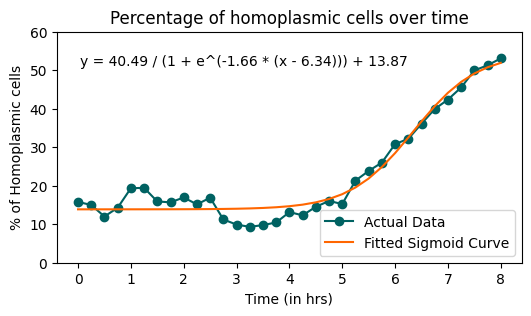

In [48]:
plt.figure(figsize=(6,3))

xdata = perc_homo_df['time']
ydata = perc_homo_df['phenotype']

# Sigmoid function definition
def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k*(x - x0))) + b
    return y

# Initial guess
p0 = [max(ydata), np.median(xdata), 1, min(ydata)]

# Curve fitting
popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='dogbox')

# Generate y values for the fitted curve
y_fit = sigmoid(xdata, *popt)

# Plot the original data
plt.plot(xdata, ydata, marker='o', linestyle='-', label='Actual Data', color='#006262')

# Plot the fitted sigmoid curve
plt.plot(xdata, y_fit, linestyle='-', label='Fitted Sigmoid Curve', color='#FF6600')

plt.text(0.05, 0.9, f'y = {popt[0]:.2f} / (1 + e^(-{popt[2]:.2f} * (x - {popt[1]:.2f}))) + {popt[3]:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.ylim(0,60)
plt.title('Percentage of homoplasmic cells over time')
plt.ylabel('% of Homoplasmic cells')
plt.xlabel('Time (in hrs)')
plt.legend(loc='lower right')

In [49]:
specific_x_values = [0, 1.5, 3, 4.5, 6, 7.5]

# Calculate corresponding y-values using the sigmoid equation
y_values = popt[0] / (1 + np.exp(-popt[2] * (np.array(specific_x_values) - popt[1]))) + popt[3]

# Print the result
print("Specific x-values:", specific_x_values)
print("Corresponding y-values:", y_values)

Specific x-values: [0, 1.5, 3, 4.5, 6, 7.5]
Corresponding y-values: [13.86683486 13.87889605 14.02331982 15.68205154 28.47572256 49.1528966 ]


In [50]:
s_curve_df = pd.DataFrame({'time': specific_x_values, 'perc_homoplasmic_cells': y_values})
s_curve_df

,time,perc_homoplasmic_cells
0,0.0,13.866835
1,1.5,13.878896
2,3.0,14.023320
3,4.5,15.682052
4,6.0,28.475723
5,7.5,49.152897


In [57]:
s_curve_df.to_csv('percentage_homo_cells_df_from_curve_lat.csv', index=False)

In [52]:
columns_to_keep = ['time', 'exp_pos_cell', 'exp_pos_rel_cell', 'generation_num', 'h', 'relationship']
h_per_timepoint_df = new_df[columns_to_keep]

In [53]:
for timepoint, group in h_per_timepoint_df.groupby('time'):
     if 'bud' in group['relationship'].values:
        mother_id = group.loc[group['relationship'] == 'bud', 'exp_pos_rel_cell']
        h_per_timepoint_df.loc[group.index, 'mother_id'] = mother_id

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [54]:
h_per_timepoint_df.rename(columns={'h': 'mk/(mk+ng)'}, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [55]:
h_per_timepoint_df['mother_id'] = h_per_timepoint_df['mother_id'].astype(str).str.replace(r'\.0$', '')
h_per_timepoint_df['exp_pos_rel_cell'] = h_per_timepoint_df['exp_pos_rel_cell'].astype(str).str.replace(r'\.0$', '')
h_per_timepoint_df

/var/folders/nh/0n1p2d3s3g54cr2b2mtcdz_80000gq/T/ipykernel_11659/1229039493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_per_timepoint_df['mother_id'] = h_per_timepoint_df['mother_id'].astype(str).str.replace(r'\.0$', '')
/var/folders/nh/0n1p2d3s3g54cr2b2mtcdz_80000gq/T/ipykernel_11659/1229039493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_per_timepoint_df['exp_pos_rel_cell'] = h_per_timepoint_df['exp_pos_rel_cell'].astype(str).str.replace(r'\.0$', '')


,time,exp_pos_cell,exp_pos_rel_cell,generation_num,mk/(mk+ng),relationship,mother_id
0,0.00,exp5_Position_1_4,exp5_Position_1_-1,1.0,0.500000,mother,nan
1,0.25,exp5_Position_1_4,exp5_Position_1_-1,1.0,0.500000,mother,nan
2,0.50,exp5_Position_1_4,exp5_Position_1_12,1.0,0.536382,mother,nan
3,0.50,exp5_Position_1_12,exp5_Position_1_4,0.0,0.485641,bud,exp5_Position_1_4
4,0.75,exp5_Position_1_4,exp5_Position_1_12,1.0,0.537893,mother,nan
...,...,...,...,...,...,...,...
11569,8.00,exp1_Position_2_562,exp1_Position_2_185,0.0,0.508168,bud,exp1_Position_2_185
11570,8.00,exp1_Position_2_563,exp1_Position_2_289,0.0,0.624747,bud,exp1_Position_2_289
11571,8.00,exp1_Position_2_564,exp1_Position_2_121,0.0,0.926366,bud,exp1_Position_2_121
11572,8.00,exp1_Position_2_565,exp1_Position_2_298,0.0,0.415209,bud,exp1_Position_2_298


In [58]:
h_per_timepoint_df.to_csv('hetero_per_timepoint_df_lat.csv', index=False)